## 1. Understand the Problem

Build and complete appropriate models on the health of the Abalone
populations within the seas surrounding the West coast of Australia. In doing so, your optimum, relative comparative investigation can be used to determine the health of the Abalone’s population, within the geographical area, for Males (M), Female (F) and Infants (I) based upon differing variables.

### Necessary libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

In [59]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('mode.chained_assignment', None)

### The datasets

In [60]:
df_2020 = pd.read_csv("./datasets/Abalone Data Set 2020.csv")
df_2021 = pd.read_csv("./datasets/Abalone Data Set 2021.csv")

## 2. Collect and Explore Your Data


### Explore datasets

In [61]:
df_2020.head(6)

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
0,M,0.46,0.36,0.10,0.51,0.22,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.06,7
5,I,0.42,0.30,0.10,0.35,0.14,0.12,8


In [62]:
df_2021.head(6)

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
0,M,0.42,0.33,0.08,0.36,0.13,0.12,7.00
1,M,0.47,0.35,0.10,0.48,0.19,0.17,8.00
2,F,0.40,0.31,0.12,0.35,0.15,0.12,10.00
3,I,0.37,0.29,0.10,0.25,0.10,0.09,10.00
4,M,0.50,0.38,0.15,0.66,0.27,0.21,19.00
5,I,0.41,0.31,0.11,0.32,0.12,0.10,9.00


In [63]:
df_2020.describe()

,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
count,"2,095.00","2,096.00","2,096.00","2,096.00","2,095.00","2,096.00","2,097.00"
mean,0.52,0.41,0.14,0.82,0.36,0.24,9.87
std,0.12,0.10,0.05,0.50,0.23,0.14,3.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.45,0.34,0.12,0.43,0.18,0.12,8.00
50%,0.54,0.42,0.14,0.79,0.33,0.23,9.00
75%,0.61,0.48,0.17,1.13,0.50,0.32,11.00
max,0.81,0.65,1.13,2.83,1.49,1.00,29.00


In [64]:
df_2021.describe()

,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
count,"2,077.00","2,078.00","2,078.00","2,076.00","2,079.00","2,078.00","2,079.00"
mean,0.53,0.41,0.14,0.84,0.36,0.24,9.98
std,0.12,0.10,0.04,0.49,0.22,0.14,3.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.46,0.35,0.12,0.45,0.19,0.13,8.00
50%,0.55,0.42,0.14,0.81,0.34,0.24,10.00
75%,0.62,0.48,0.17,1.17,0.51,0.33,11.00
max,0.80,0.61,0.25,2.55,1.25,0.89,27.00


In [65]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2097 non-null   object 
 1   Length(mm)        2095 non-null   float64
 2   Diameter(mm)      2096 non-null   float64
 3   Height(mm)        2096 non-null   float64
 4   WholeWeight(g)    2096 non-null   float64
 5   ShuckedWeight(g)  2095 non-null   float64
 6   SellWeight(g)     2096 non-null   float64
 7   Spots             2097 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 131.2+ KB


In [66]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2080 non-null   object 
 1   Length(mm)        2077 non-null   float64
 2   Diameter(mm)      2078 non-null   float64
 3   Height(mm)        2078 non-null   float64
 4   WholeWeight(g)    2076 non-null   float64
 5   ShuckedWeight(g)  2079 non-null   float64
 6   SellWeight(g)     2078 non-null   float64
 7   Spots             2079 non-null   float64
dtypes: float64(7), object(1)
memory usage: 130.1+ KB


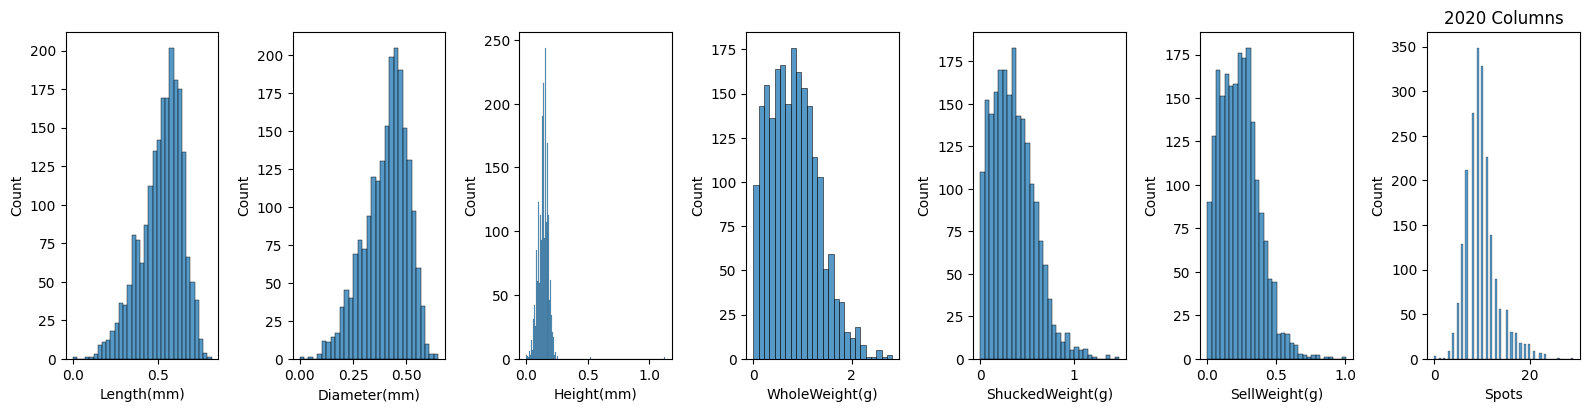

In [67]:
plt.figure(figsize=(16,4))
plotnumber=1
for col in ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']:
  ax =plt.subplot(1,7,plotnumber)
  sns.histplot(df_2020[col])
  plotnumber+=1
plt.tight_layout()
plt.title("2020 Columns")
plt.show()

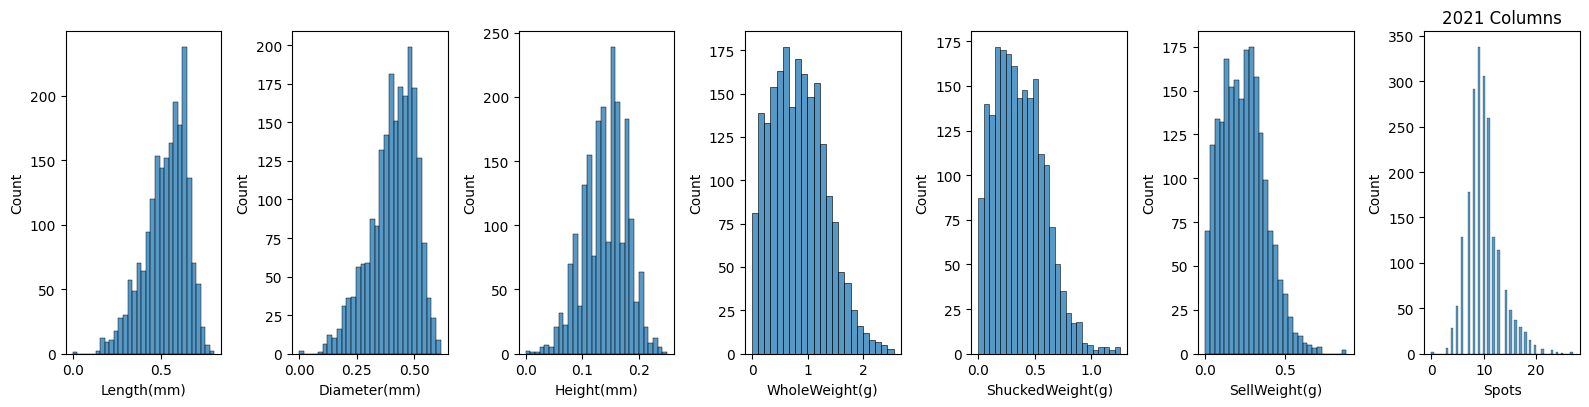

In [68]:
plt.figure(figsize=(16,4))
plotnumber=1
for col in ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']:
  ax =plt.subplot(1,7,plotnumber)
  sns.histplot(df_2021[col])
  plotnumber+=1
plt.tight_layout()
plt.title("2021 Columns")
plt.show()

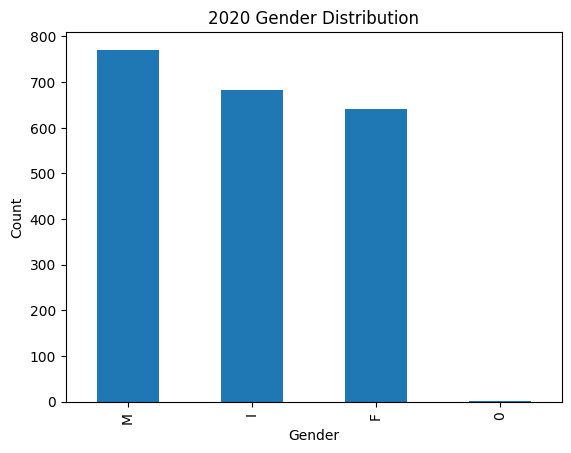

In [69]:
df_2020['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('2020 Gender Distribution')

plt.show()

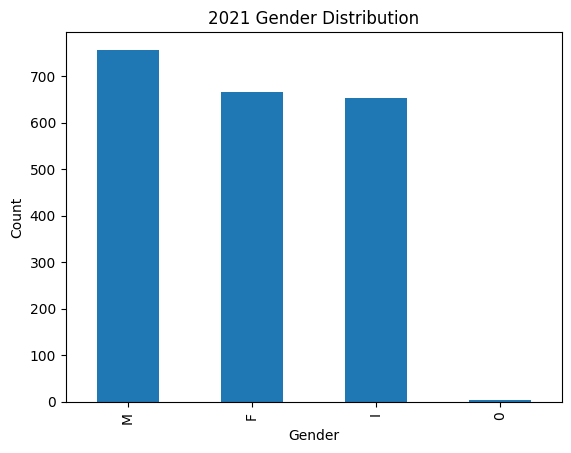

In [70]:
df_2021['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('2021 Gender Distribution')

plt.show()

## 3. Data Preprocessing

#### 2020

In [71]:
null_values_2020 = df_2020.isnull().sum().sum()
print(f"Number of null values 1 (2020): {null_values_2020}")

df_2020.replace(0, np.nan, inplace=True)

null_values_2020_cleaned = df_2020.isnull().sum().sum()
print(f"Number of null values 2 (2020): {null_values_2020_cleaned}")

Number of null values 1 (2020): 8
Number of null values 2 (2020): 24


In [72]:
df_2020.dropna(inplace=True)
df_2020.isnull().sum()

Sex                 0
Length(mm)          0
Diameter(mm)        0
Height(mm)          0
WholeWeight(g)      0
ShuckedWeight(g)    0
SellWeight(g)       0
Spots               0
dtype: int64

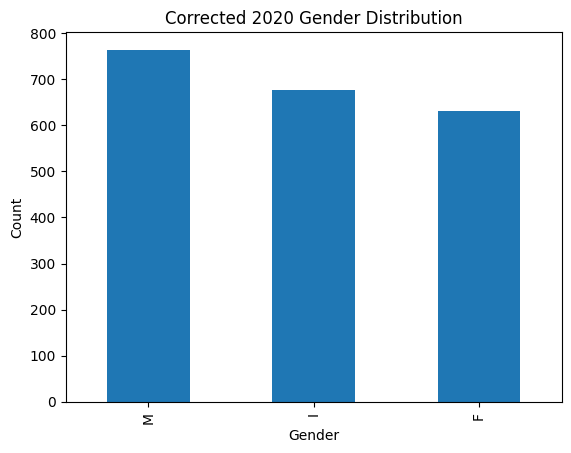

In [73]:
gender_mode_value_2020 = df_2020['Sex'].mode()[0]
df_2020['Sex'].replace('0', gender_mode_value_2020, inplace=True)

df_2020['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Corrected 2020 Gender Distribution')

plt.show()

#### 2021

In [74]:
null_values_2021 = df_2021.isnull().sum().sum()
print(f"Number of null values (2021): {null_values_2021}")

df_2021.replace(0, np.nan, inplace=True)

null_values_2021_cleaned = df_2021.isnull().sum().sum()
print(f"Number of null values in cleaned data (2021): {null_values_2021_cleaned}")

Number of null values (2021): 15
Number of null values in cleaned data (2021): 25


In [75]:
df_2021.dropna(inplace=True)
df_2021.isnull().sum()

Sex                 0
Length(mm)          0
Diameter(mm)        0
Height(mm)          0
WholeWeight(g)      0
ShuckedWeight(g)    0
SellWeight(g)       0
Spots               0
dtype: int64

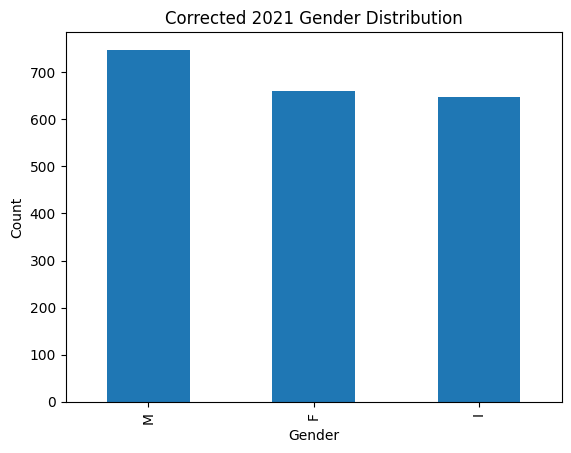

In [76]:
gender_mode_value_2021 = df_2021['Sex'].mode()[0]
df_2021['Sex'].replace('0', gender_mode_value_2021, inplace=True)

df_2021['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Corrected 2021 Gender Distribution')

plt.show()

In [77]:
df_2020['Spots'] = df_2020['Spots'].round().astype(int)
df_2021['Spots'] = df_2021['Spots'].round().astype(int)

In [78]:
df_2020.head(6)

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
0,M,0.46,0.36,0.10,0.51,0.22,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.06,7
5,I,0.42,0.30,0.10,0.35,0.14,0.12,8


In [79]:
df_2021.head(6)

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
0,M,0.42,0.33,0.08,0.36,0.13,0.12,7
1,M,0.47,0.35,0.10,0.48,0.19,0.17,8
2,F,0.40,0.31,0.12,0.35,0.15,0.12,10
3,I,0.37,0.29,0.10,0.25,0.10,0.09,10
4,M,0.50,0.38,0.15,0.66,0.27,0.21,19
5,I,0.41,0.31,0.11,0.32,0.12,0.10,9


In [80]:
numerical_columns = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']

z_scores_2020 = df_2020[numerical_columns].apply(zscore)
z_scores_2021 = df_2021[numerical_columns].apply(zscore)

threshold = 3

outliers_2020 = (z_scores_2020 > threshold) | (z_scores_2020 < -3)
outliers_2021 = (z_scores_2021 > threshold) | (z_scores_2021 < -3)

outlier_count_2020 = outliers_2020.any(axis=1).sum()
outlier_count_2021 = outliers_2021.any(axis=1).sum()

cleaned_df_2020 = df_2020[~outliers_2020.any(axis=1)]
cleaned_df_2021 = df_2021[~outliers_2021.any(axis=1)]

print(f"Outlier count (2020): {outlier_count_2020}")
print(f"Outlier count (2021): {outlier_count_2021}")
print(f"Data with outliers removed (2020): {cleaned_df_2020.shape}")
print(f"Data with outliers removed (2021): {cleaned_df_2021.shape}")

Outlier count (2020): 76
Outlier count (2021): 60
Data with outliers removed (2020): (1997, 8)
Data with outliers removed (2021): (1996, 8)


#### Descriptive statistics on cleaned data

In [81]:
cleaned_df_2020.describe()

,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
count,"1,997.00","1,997.00","1,997.00","1,997.00","1,997.00","1,997.00","1,997.00"
mean,0.52,0.40,0.14,0.79,0.35,0.23,9.65
std,0.12,0.10,0.04,0.46,0.21,0.13,2.85
min,0.16,0.11,0.01,0.02,0.01,0.01,3.00
25%,0.45,0.34,0.11,0.42,0.18,0.12,8.00
50%,0.54,0.42,0.14,0.77,0.33,0.22,9.00
75%,0.60,0.47,0.17,1.11,0.48,0.32,11.00
max,0.77,0.60,0.24,2.30,1.03,0.65,19.00


In [82]:
cleaned_df_2021.describe()

,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots
count,"1,996.00","1,996.00","1,996.00","1,996.00","1,996.00","1,996.00","1,996.00"
mean,0.52,0.41,0.14,0.82,0.36,0.24,9.84
std,0.11,0.09,0.04,0.46,0.21,0.13,2.88
min,0.17,0.12,0.03,0.02,0.01,0.01,3.00
25%,0.46,0.35,0.12,0.45,0.19,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.33,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.32,11.00
max,0.77,0.60,0.25,2.24,1.01,0.62,19.00


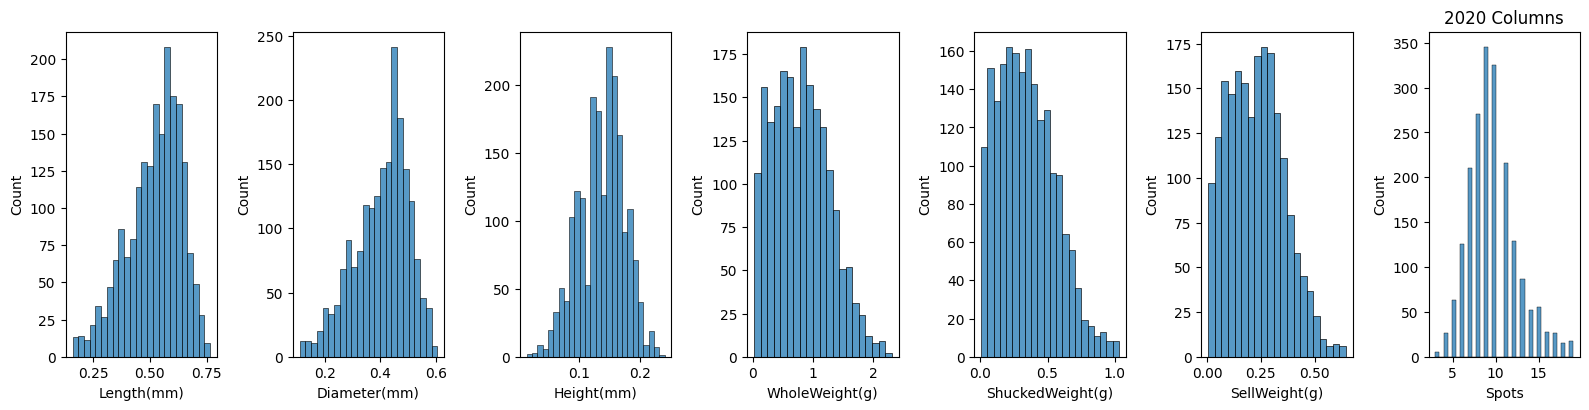

In [83]:
plt.figure(figsize=(16,4))
plotnumber=1
for col in ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']:
  ax =plt.subplot(1,7,plotnumber)
  sns.histplot(cleaned_df_2020[col])
  plotnumber+=1
plt.tight_layout()
plt.title("2020 Columns")
plt.show()

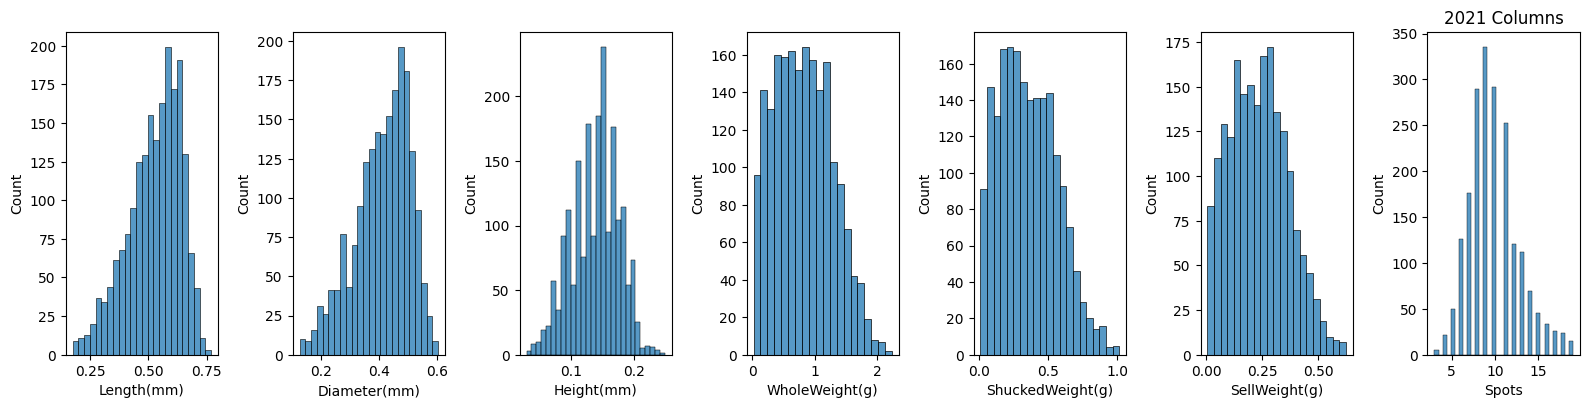

In [84]:
plt.figure(figsize=(16,4))
plotnumber=1
for col in ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']:
  ax =plt.subplot(1,7,plotnumber)
  sns.histplot(cleaned_df_2021[col])
  plotnumber+=1
plt.tight_layout()
plt.title("2021 Columns")
plt.show()

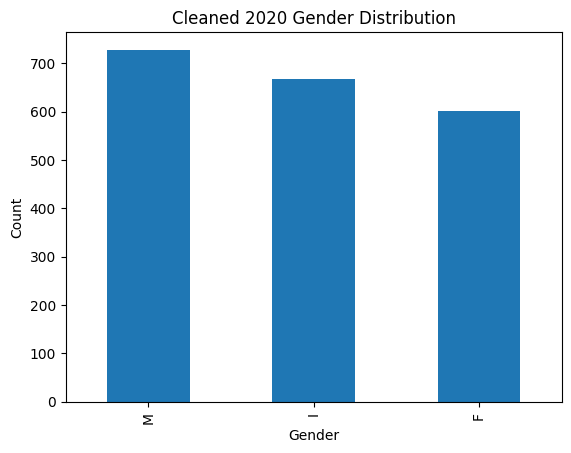

In [85]:
cleaned_df_2020['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cleaned 2020 Gender Distribution')

plt.show()

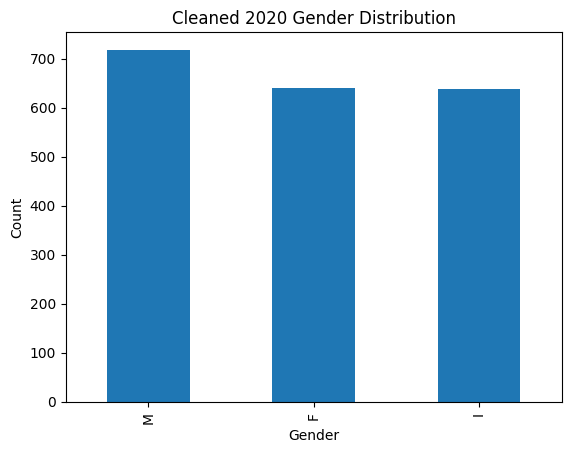

In [86]:
cleaned_df_2021['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cleaned 2020 Gender Distribution')

plt.show()

In [87]:
cleaned_df_2020['Sex'] = cleaned_df_2020['Sex'].map({'M': 1, 'F': 2, 'I': 3})
cleaned_df_2021['Sex'] = cleaned_df_2021['Sex'].map({'M': 1, 'F': 2, 'I': 3})

In [88]:
cleaned_df_2020['Sex'].head(6)

0    1
1    1
2    2
3    1
4    3
5    3
Name: Sex, dtype: int64

In [89]:
cleaned_df_2021['Sex'].head(6)

0    1
1    1
2    2
3    3
4    1
5    3
Name: Sex, dtype: int64

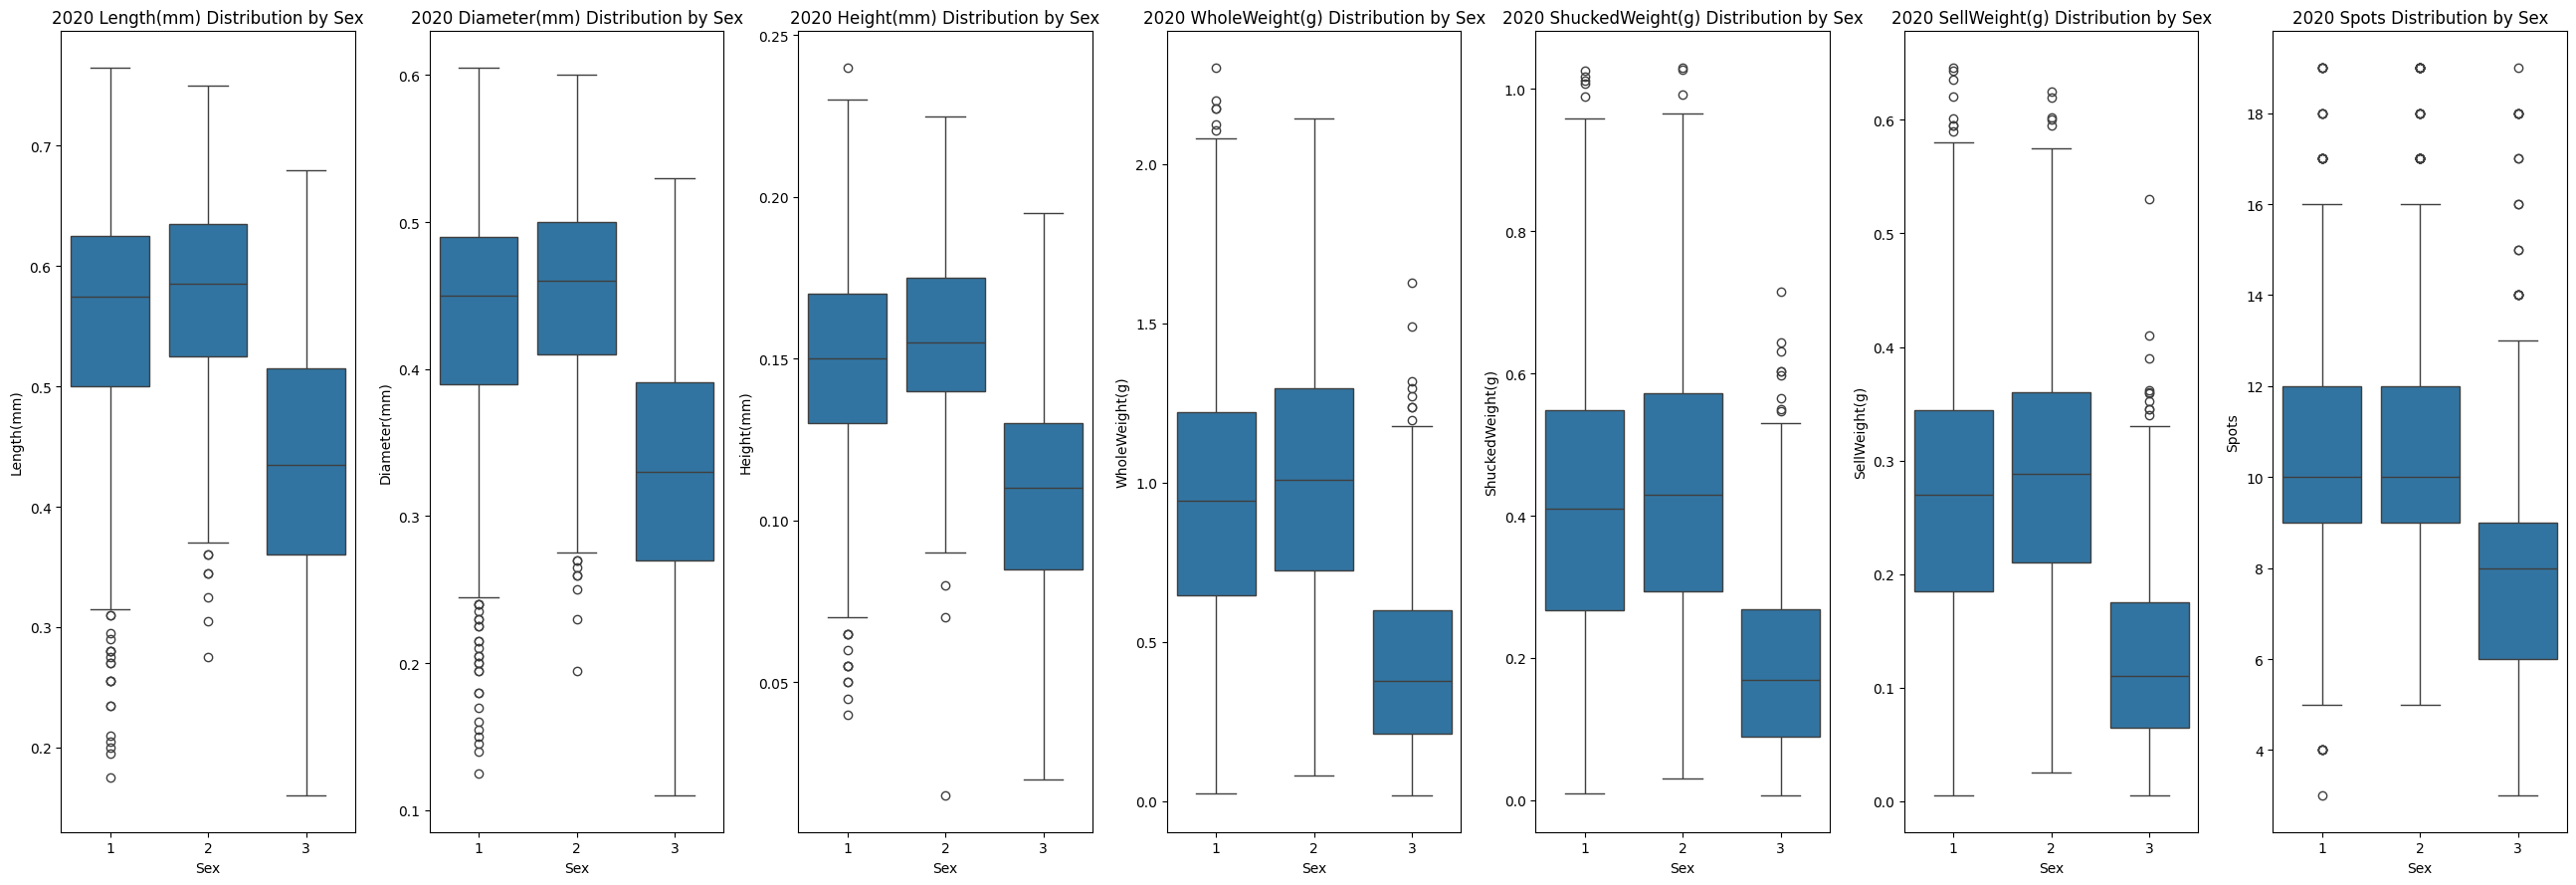

In [90]:
features = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']

plt.figure(figsize=(26, 9))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x='Sex', y=feature, data=cleaned_df_2020)
    plt.title(f'2020 {feature} Distribution by Sex')

plt.tight_layout()
plt.show()

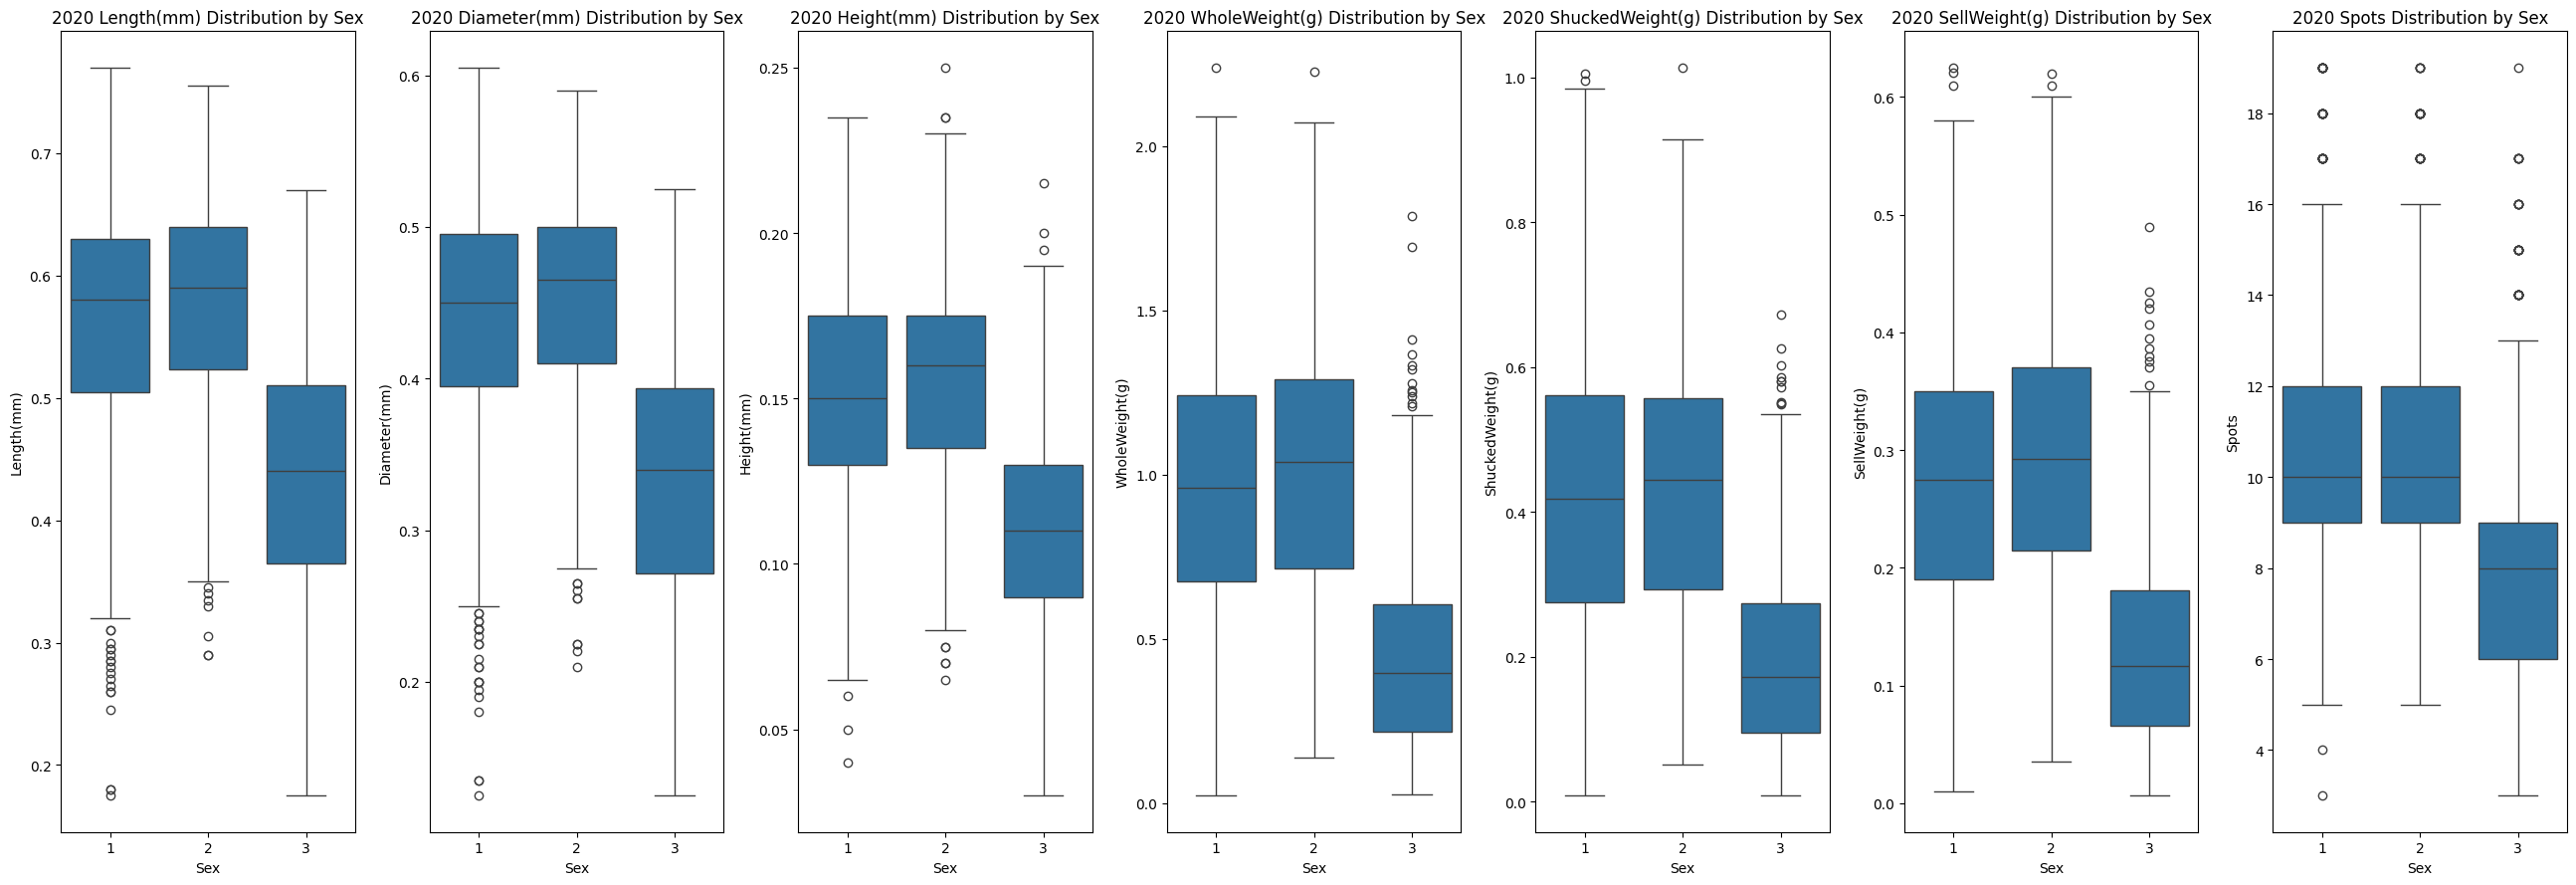

In [91]:
features = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']

plt.figure(figsize=(26, 9))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x='Sex', y=feature, data=cleaned_df_2021)
    plt.title(f'2020 {feature} Distribution by Sex')

plt.tight_layout()
plt.show()

## 4. Feature Selection

#### Feature Correlation

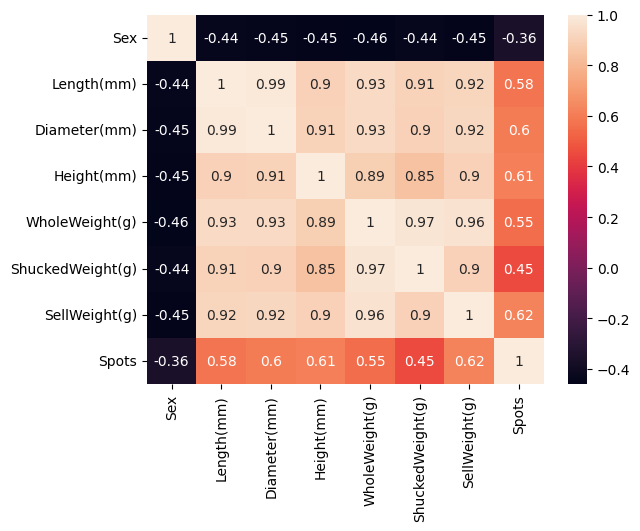

In [92]:
correlation_matrix = cleaned_df_2020.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

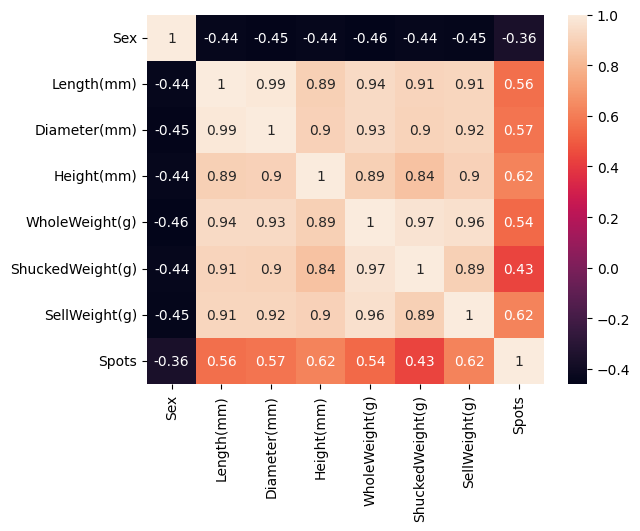

In [93]:
correlation_matrix = cleaned_df_2021.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Drop Redundant Columns

In [94]:
cleaned_df_2020_optimized = cleaned_df_2020.drop(['ShuckedWeight(g)', 'SellWeight(g)', 'Diameter(mm)'], axis=1)
cleaned_df_2021_optimized = cleaned_df_2021.drop(['ShuckedWeight(g)', 'SellWeight(g)', 'Diameter(mm)'], axis=1)

In [95]:
cleaned_df_2020_optimized.head(6)

,Sex,Length(mm),Height(mm),WholeWeight(g),Spots
0,1,0.46,0.10,0.51,15
1,1,0.35,0.09,0.23,7
2,2,0.53,0.14,0.68,9
3,1,0.44,0.12,0.52,10
4,3,0.33,0.08,0.20,7
5,3,0.42,0.10,0.35,8


In [96]:
cleaned_df_2021_optimized.head(6)

,Sex,Length(mm),Height(mm),WholeWeight(g),Spots
0,1,0.42,0.08,0.36,7
1,1,0.47,0.10,0.48,8
2,2,0.40,0.12,0.35,10
3,3,0.37,0.10,0.25,10
4,1,0.50,0.15,0.66,19
5,3,0.41,0.11,0.32,9


## 4. Train and Evaluate Models

#### Initialise models

In [97]:
log_r = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
km = KMeans(n_clusters=2, random_state=42)

#### Train and evaluate clustering model

##### KMeans Clustering

###### 2020

In [98]:
features = ['Length(mm)',	'WholeWeight(g)']

X2020 = cleaned_df_2020_optimized[features]
cluster_labels2020 = km.fit_predict(X2020)
cleaned_df_2020_optimized['Health_Status'] = cluster_labels2020

In [99]:
sil_score = silhouette_score(X2020, cluster_labels2020)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.58


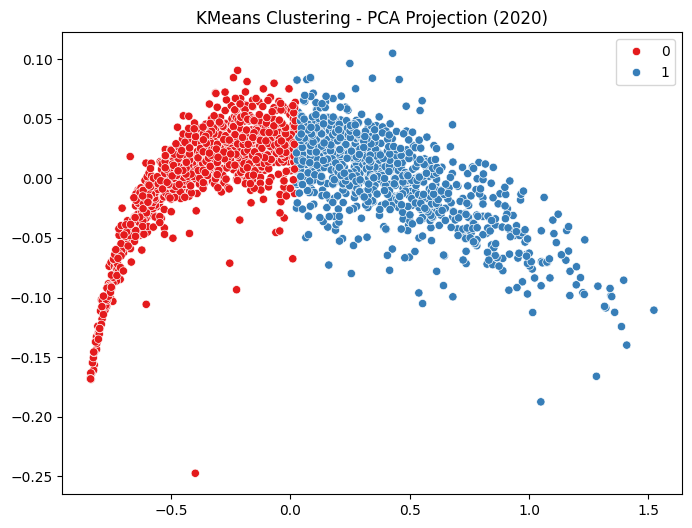

In [100]:
pca2020 = PCA(n_components=2)
X_pca2020 = pca2020.fit_transform(X2020)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca2020[:, 0], y=X_pca2020[:, 1], hue=cluster_labels2020, palette='Set1', legend='full')
plt.title('KMeans Clustering - PCA Projection (2020)')
plt.show()

In [101]:
cleaned_df_2020_optimized.groupby('Health_Status').median()

,Sex,Length(mm),Height(mm),WholeWeight(g),Spots
Health_Status,,,,,
0,3.00,0.45,0.12,0.44,8.00
1,2.00,0.61,0.17,1.13,10.00


###### 2021

In [102]:
features = ['Length(mm)', 'WholeWeight(g)']

X2021 = cleaned_df_2021_optimized[features]
cluster_labels2021 = km.fit_predict(X2021)
cleaned_df_2021_optimized['Health_Status'] = cluster_labels2021

In [103]:
sil_score = silhouette_score(X2021, cluster_labels2021)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.59


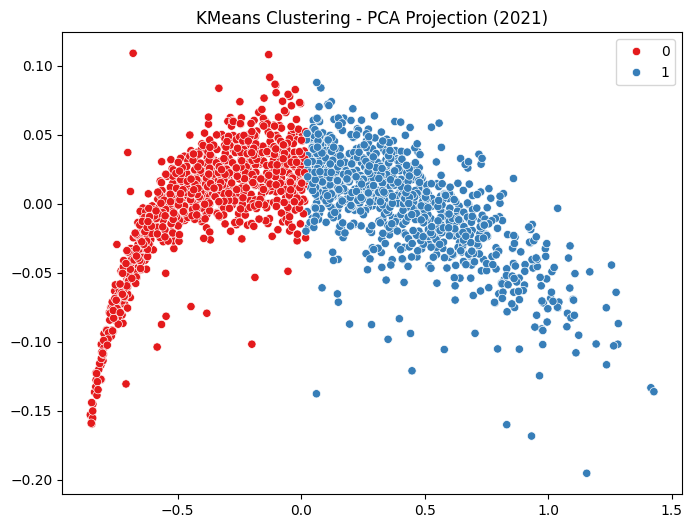

In [104]:
pca2021 = PCA(n_components=2)
X_pca2021 = pca2021.fit_transform(X2021)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca2021[:, 0], y=X_pca2021[:, 1], hue=cluster_labels2021, palette='Set1', legend='full')
plt.title('KMeans Clustering - PCA Projection (2021)')
plt.show()

In [105]:
cleaned_df_2021_optimized.groupby('Health_Status').median()

,Sex,Length(mm),Height(mm),WholeWeight(g),Spots
Health_Status,,,,,
0,3.00,0.46,0.12,0.46,8.00
1,2.00,0.62,0.17,1.17,11.00


#### Train and evaluate classification models

#### Select target

In [106]:
x2020 = cleaned_df_2020_optimized[['Sex',	'Height(mm)',	'Spots']]
y2020 = cleaned_df_2020_optimized['Health_Status']

In [107]:
x2021 = cleaned_df_2021_optimized[['Sex',	'Height(mm)', 'Spots']]
y2021 = cleaned_df_2021_optimized['Health_Status']

#### Split data

In [108]:
x_train2020, x_test2020, y_train2020, y_test2020 = train_test_split(x2020, y2020, test_size=0.3, random_state=42)
x_train2021, x_test2021, y_train2021, y_test2021= train_test_split(x2021, y2021, test_size=0.3, random_state=42)

#### Scale data

In [109]:
scaler = StandardScaler()

x_train2020_scaled = scaler.fit_transform(x_train2020)
x_test2020_scaled = scaler.transform(x_test2020)

x_train2021_scaled = scaler.fit_transform(x_train2021)
x_test2021_scaled = scaler.transform(x_test2021)

In [110]:
def evaluate_model(model, X_train, X_test, y_train, y_test, year):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__} - {year}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"\nClassification Report: \n{classification_report(y_test, y_pred)}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model.__class__.__name__} - {year} - Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

##### Logistic regression

Model: LogisticRegression - 2020
Accuracy: 0.78

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       317
           1       0.75      0.80      0.77       283

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



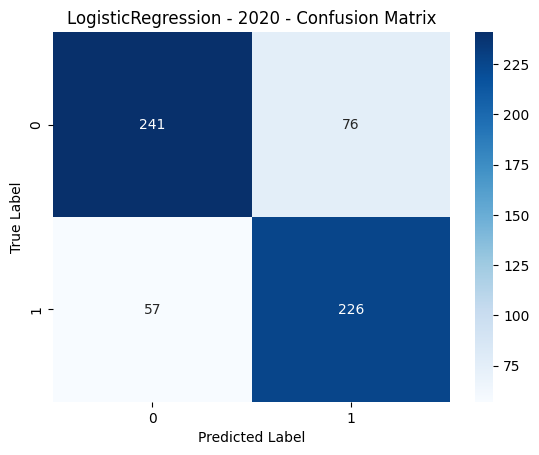

In [111]:
evaluate_model(log_r, x_train2020, x_test2020, y_train2020, y_test2020, 2020)

Model: LogisticRegression - 2021
Accuracy: 0.74

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       306
           1       0.72      0.77      0.75       293

    accuracy                           0.74       599
   macro avg       0.74      0.74      0.74       599
weighted avg       0.74      0.74      0.74       599



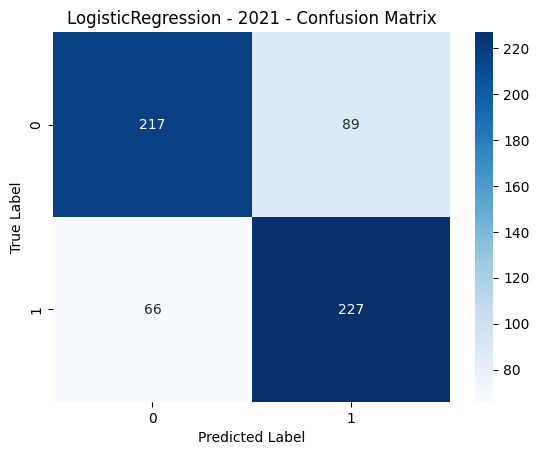

In [112]:
evaluate_model(log_r, x_train2021, x_test2021, y_train2021, y_test2021, 2021)

##### Random forest

Model: RandomForestClassifier - 2020
Accuracy: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       317
           1       0.84      0.92      0.88       283

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



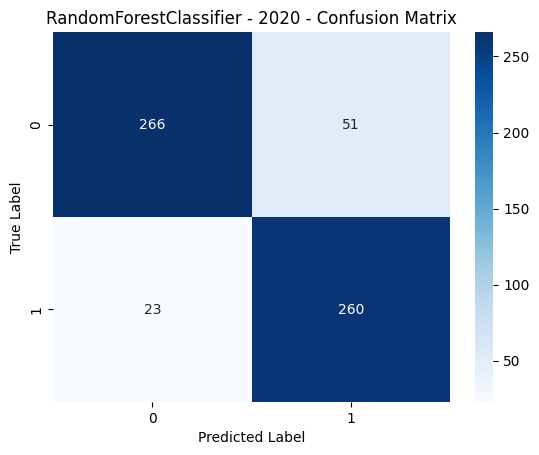

In [113]:
evaluate_model(rf, x_train2020_scaled, x_test2020_scaled, y_train2020, y_test2020, 2020)

Model: RandomForestClassifier - 2021
Accuracy: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       306
           1       0.88      0.88      0.88       293

    accuracy                           0.88       599
   macro avg       0.88      0.88      0.88       599
weighted avg       0.88      0.88      0.88       599



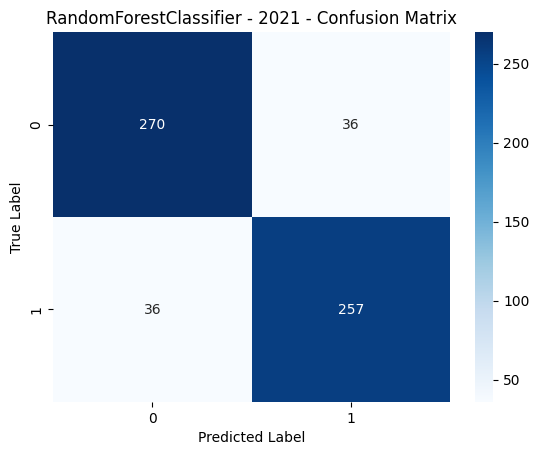

In [114]:
evaluate_model(rf, x_train2021_scaled, x_test2021_scaled, y_train2021, y_test2021, 2021)